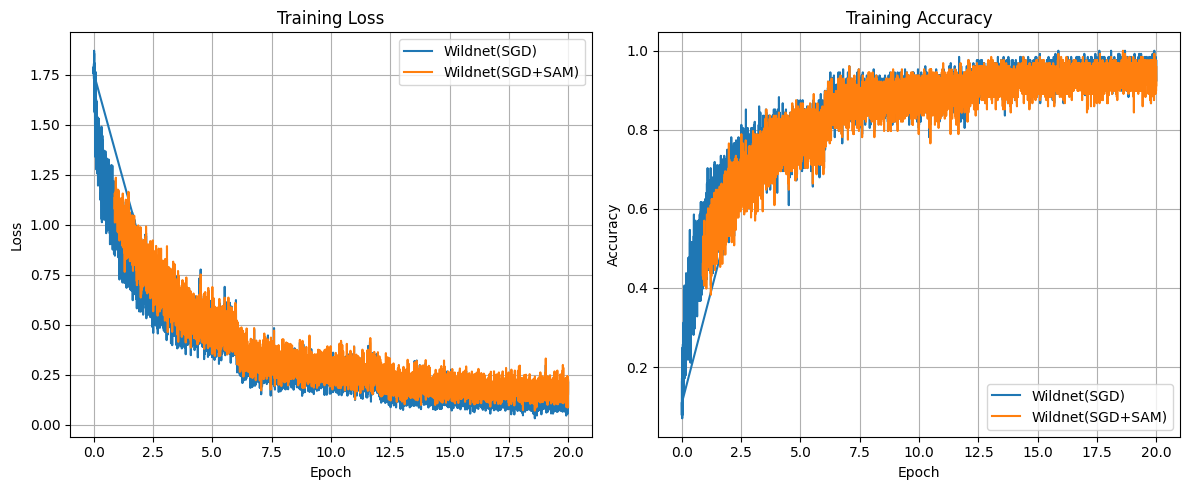

In [1]:
%run plot_training_curves.py --csv_files W.csv W_SAM_2.csv --labels "Wildnet(SGD)" "Wildnet(SGD+SAM)" --batch_size 128 --root_dir training_result/

In [1]:
!python train.py --epochs 2 --csv_file_name 'DG_SAM.csv' --model 'WideResNet' --use_sam True --rho 0.5

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
┏━━━━━━━━━━━━━━┳━━━━━━━╸T╺╸R╺╸A╺╸I╺╸N╺━━━━━━━┳━━━━━━━╸S╺╸T╺╸A╺╸T╺╸S╺━━━━━━━┳━━━━━━━╸V╺╸A╺╸L╺╸I╺╸D╺━━━━━━━┓
┃              ┃              ╷              ┃              ╷              ┃              ╷              ┃
┃       epoch  ┃        loss  │    accuracy  ┃        l.r.  │     elapsed  ┃        loss  │    accuracy  ┃
┠──────────────╂──────────────┼──────────────╂──────────────┼──────────────╂──────────────┼──────────────┨
┃           0  ┃      1.3799  │     34.22 %  ┃   1.000e-01  │   05:50 min  ┠┈█████▒┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┨^C
Traceback (most recent call last):
  File "/root/sam/example/train.py", line 98, in <module>
    smooth_crossentropy(model(inputs), targets, smoothing=args.label_smoothing).mean().backward()
                        ^^^^^^^^^^^^^
  File "/root/miniconda3/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    

In [ ]:
!python train.py --epochs 2 --csv_file_name 'DG.csv' --model 'WideResNet' --rho 0.5

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
┏━━━━━━━━━━━━━━┳━━━━━━━╸T╺╸R╺╸A╺╸I╺╸N╺━━━━━━━┳━━━━━━━╸S╺╸T╺╸A╺╸T╺╸S╺━━━━━━━┳━━━━━━━╸V╺╸A╺╸L╺╸I╺╸D╺━━━━━━━┓
┃              ┃              ╷              ┃              ╷              ┃              ╷              ┃
┃       epoch  ┃        loss  │    accuracy  ┃        l.r.  │     elapsed  ┃        loss  │    accuracy  ┃
┠──────────────╂──────────────┼──────────────╂──────────────┼──────────────╂──────────────┼──────────────┨
┃           0  ┃      1.6445  │     20.39 %  ┃   1.000e-01  │   00:53 min  ┠┈█░┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┨

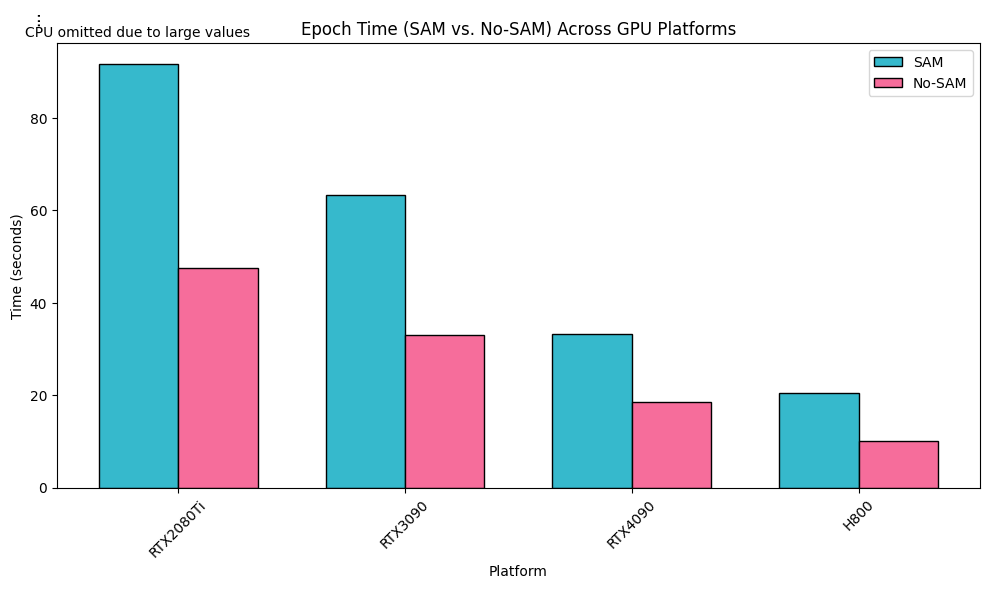

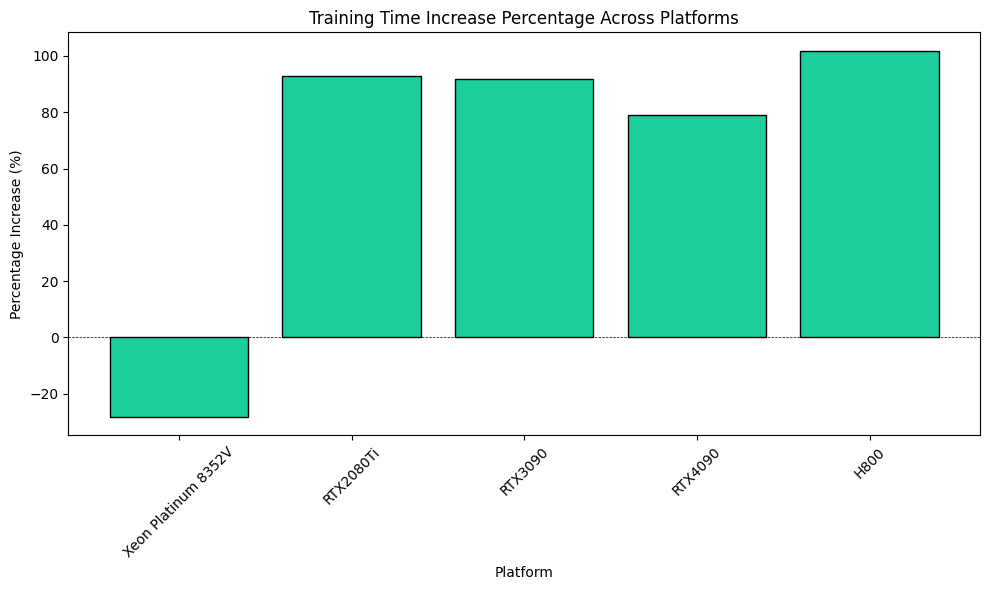

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
platforms = ["Xeon Platinum 8352V", "RTX2080Ti", "RTX3090", "RTX4090", "H800"]
sam_times = [3750, 91.62, 63.40, 33.17, 20.45]  # SAM Epoch times (seconds)
nosam_times = [5210, 47.52, 33.07, 18.52, 10.13]  # No-SAM Epoch times (seconds)
increase_percent = [-28.34, 92.76, 91.71, 79.01, 101.9]  # Training time increase (%)

# Plot 1: Epoch Time (SAM vs. No-SAM) with CPU abbreviated
plt.figure(figsize=(10, 6))

# Bar positions
bar_width = 0.35
index = np.arange(len(platforms[1:]))  # Skip CPU for this plot

# Plot bars for GPUs only
plt.bar(index, sam_times[1:], bar_width, label="SAM", color="#36B9CC", edgecolor="black")
plt.bar(index + bar_width, nosam_times[1:], bar_width, label="No-SAM", color="#F66D9B", edgecolor="black")

# Add ellipsis to indicate CPU omission
plt.text(-0.5, 100, "...", fontsize=12, rotation=90, verticalalignment="bottom")
plt.text(-0.5, 100, "CPU omitted due to large values", fontsize=10, verticalalignment="top")

# Customize plot
plt.xlabel("Platform")
plt.ylabel("Time (seconds)")
plt.title("Epoch Time (SAM vs. No-SAM) Across GPU Platforms")
plt.xticks(index + bar_width / 2, platforms[1:], rotation=45)
plt.legend()
plt.tight_layout()

# Show Plot 1
plt.show()

# Plot 2: Training Time Increase Percentage
plt.figure(figsize=(10, 6))

# Plot bars for all platforms
index_all = np.arange(len(platforms))
plt.bar(index_all, increase_percent, color="#1CCE9B", edgecolor="black")

# Customize plot
plt.xlabel("Platform")
plt.ylabel("Percentage Increase (%)")
plt.title("Training Time Increase Percentage Across Platforms")
plt.xticks(index_all, platforms, rotation=45)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")  # Add zero line for clarity
plt.tight_layout()

# Show Plot 2
plt.show()